[Python and R code templates be found here](https://github.com/GEOS300/Assignment02) to help get you started.


## Instructions

It is strongly recommended that you complete the assignment in Python or R, although you can complete it in excel/numbers if necessary.  They will download the data for you and get you started with a few blocks of code to make plots and tables.  If you are electing to complete the lab in excel, you can find all the relevant data files here [here](https://github.com/GEOS300/AssignmentData/).  **Note** these data are in .csv format.  If you plan to work in excel, you should save a copy of the data in a suitable excel format (e.g., .xlsx) before making any charts or doing any calculations.

Please upload your answers including all calculations, discussions, tables, and graphs in a single document (PDF or HTML file). Note that you can download your .ipynb file under 'File $\gg$ Download as $\gg$ HTLM or PDF via Latex' and submit this as your report. Label the report document with your name and your student number. Upload your answers to Canvas. **Do not attach a spreadsheet.**

**Make Sure** your student number is include on each plot you produce, and that each plot is using the correct units.



## Westham Island Energy Balance 

You have been randomly assigned a single day of data from the Westham Island energy balance station based on your student number (@tbl-dates).  Refer to the [metadata](https://github.com/GEOS300/AssignmentData/blob/main/WesthamIslandSoilData/Metadata.txt) for a description of the data with variable names, units, and sensor depths.  You can see this [lecture slide](https://geos300.github.io/Lectures/06.html#/24) for a photo of the station.  

The soil at the climate station has been analyzed in the UBC Soil Water Atmosphere Lab and the following values were determined: porosity is $P=0.57$, bulk density of the dry soil is $\rho_{dry} = 1.13$ Mg m$^{-3}$. The soil organic mass fraction was determined 3.77 % (of total dry soil mass). Assume that those values apply to the entire vertical profile.

Last digit of student number | date (YYYMMDD)
-----------------------------|-----
0|20090614
1|20090630
2|20090701
3|20090702
4|20090711
5|20090716
6|20090721
7|20090729
8|20090730
9|20090802

: The date you are responsible for analyzing in YYYY (Year) MM (month) DD (day) format.  The filename for your date will follow this format: YYYYMMDD.txt.  e.g., 20240214.txt would be the file for February 14th, 2023.  If you are completing the assignment using Python or R, just edit the filename in the corresponding template. If you are completing the assignment by hand or in excel, you can find the data files [here](https://github.com/GEOS300/AssignmentData/tree/main/WesthamIslandSoilData). {#tbl-dates}


---


In [55]:
#| include: false
# Enter your information below
Student_Name = 'June Skeeter'
Student_Number = 123456789
print(f'GEOS 300 Assignment Submission for {Student_Name}: {Student_Number}')

GEOS 300 Assignment Submission for June Skeeter: 123456789


In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt

In [57]:
# Import the data from github & parse the timestamp for each record
## **NOTE**  Make sure to edit the filename in the URL so it corresponds to the date you were assigned.

dates = [20090614,20090630,20090701,20090702,20090711,20090716,20090721,20090729,20090730,20090802]
all_days = {}
for date in dates:
    data_url=f'https://raw.githubusercontent.com/GEOS300/AssignmentData/main/WesthamIslandSoilData/{date}.txt'
    # Pandas (pd here) allows us to set a timestamp as an index which lets us easily parse time series data
    df = pd.read_csv(data_url,parse_dates=['TIME(PST)'],index_col=['TIME(PST)'],na_values=-9999)

    # All sub-surface data were collected at the same frequency (15-minute intervals).  
    # However, H data were only available at 30-minute resolution.  
    # So we'll use a simple gap-filling procedure to estimate missing values from the nearest available observations.   
    # Use linear interpolation to estimate missing H values where possible.
    df['H_filled'] = df['H'].interpolate()
    # Backfill where linear interpolation doesn't work (the first observation)
    df['H_filled'] = df['H_filled'].bfill()

    all_days[date]=df

print('Data imported and gap-filled successfully.')



Data imported and gap-filled successfully.


## Question 1

Run the code block above, making sure you've edited the file name so that it corresponds to **your assigned date** (@tbl-dates).  Then in the space below, calculate descriptive statistics for the all the variables in the dataset.  Comment on the mean value and the range (max-min) of the four soil temperature variables.  **Hint** you can refer to Assignment 1 for the appropriate commands to list descriptive statistics of a dataset.

In [58]:
for date in dates:
    print(f'\n\nDescriptive statistics for {date}:')
    print('Mean values:\n',all_days[date][['T_1','T_2','T_3','T_4']].mean())
    print('\nRanges:\n',(all_days[date][['T_1','T_2','T_3','T_4']].max()-all_days[date][['T_1','T_2','T_3','T_4']].min()))



Descriptive statistics for 20090614:
Mean values:
 T_1    13.195448
T_2    12.891948
T_3    12.391125
T_4    10.677094
dtype: float64

Ranges:
 T_1    6.514
T_2    3.464
T_3    1.440
T_4    0.319
dtype: float64


Descriptive statistics for 20090630:
Mean values:
 T_1    12.982625
T_2    12.561792
T_3    12.013458
T_4    10.570448
dtype: float64

Ranges:
 T_1    6.073
T_2    3.290
T_3    1.439
T_4    0.286
dtype: float64


Descriptive statistics for 20090701:
Mean values:
 T_1    13.015823
T_2    12.630385
T_3    12.108229
T_4    10.631198
dtype: float64

Ranges:
 T_1    5.908
T_2    3.105
T_3    1.312
T_4    0.241
dtype: float64


Descriptive statistics for 20090702:
Mean values:
 T_1    13.342177
T_2    12.890094
T_3    12.267708
T_4    10.674479
dtype: float64

Ranges:
 T_1    6.326
T_2    3.372
T_3    1.517
T_4    0.290
dtype: float64


Descriptive statistics for 20090711:
Mean values:
 T_1    13.592229
T_2    12.954781
T_3    12.236781
T_4    10.672406
dtype: float64

Ranges:
 T_

#### Answer

Exact values vary by date, but the general patterns to point out:

1. Temperatures decrease with depth: deeper layers of soil are cooler
2. Diurnal ranges decrease with depth: deeper layers are less variable

## Question 2

First we'll make a plot of net radiation ($R_n$), sensible heat flux ($H$), and ground heat flux ($H_g$).  Describe the patterns you see here and discuss how these three components of the energy balance compare to one another at this site.


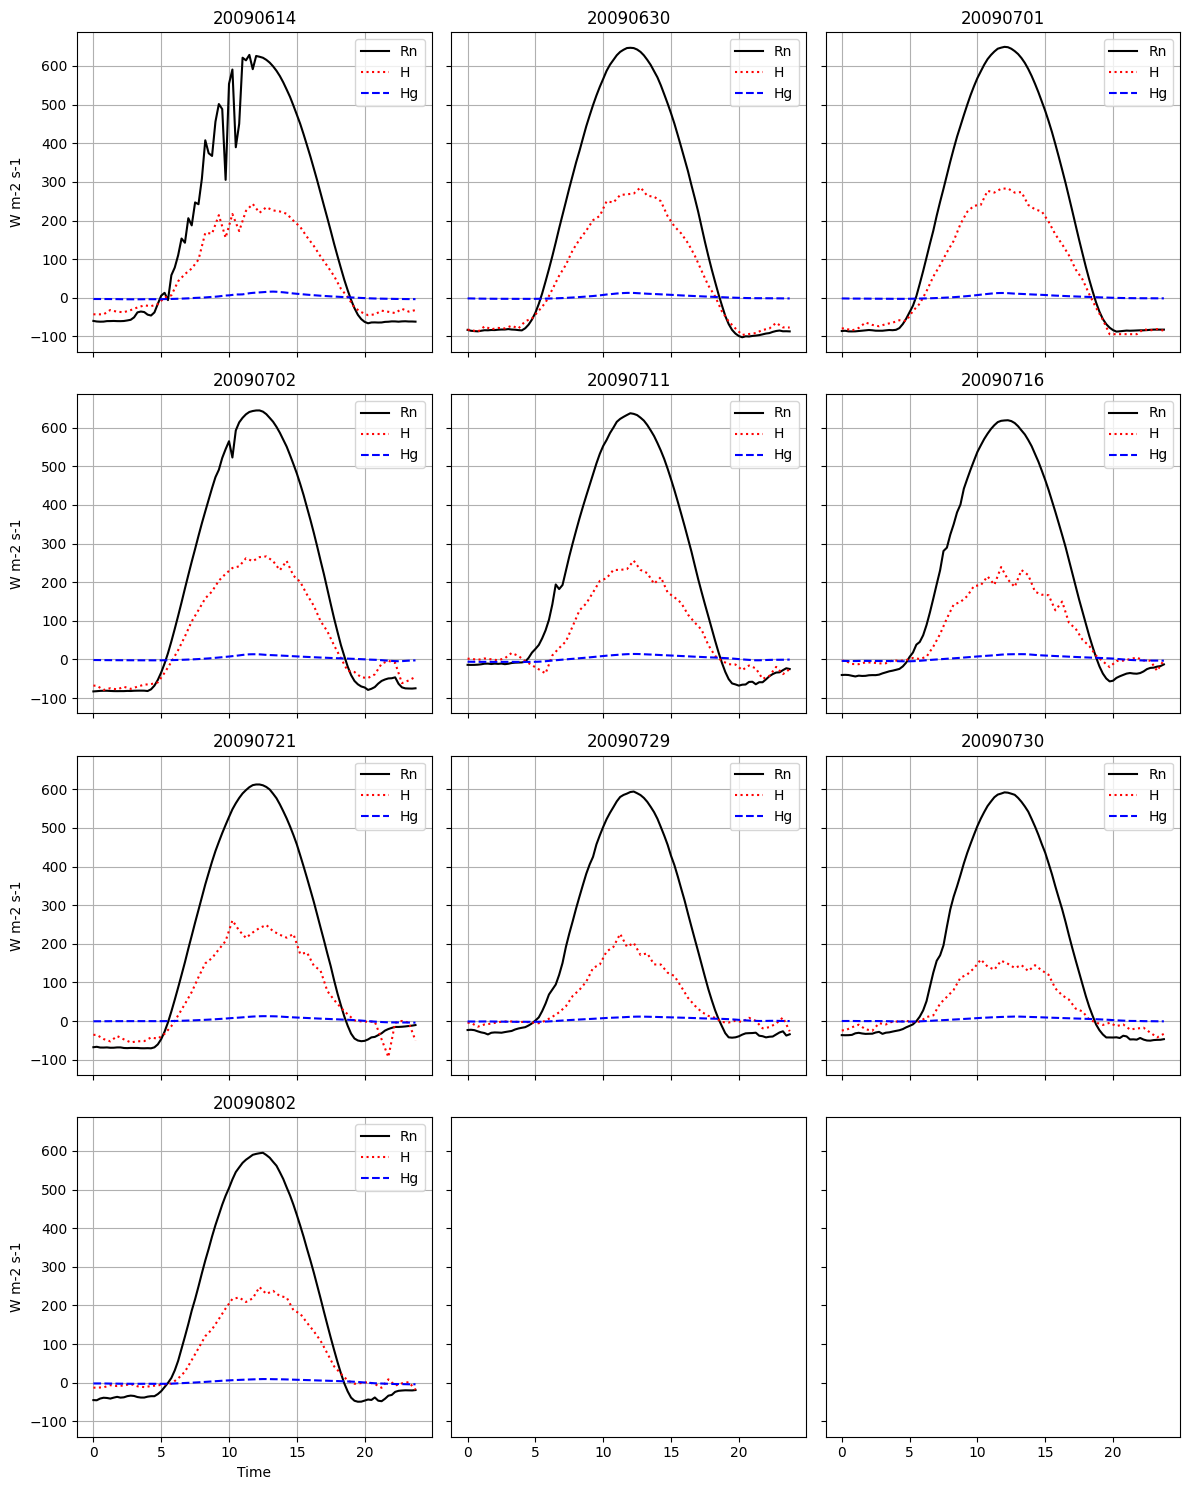

In [59]:
fig,ax=plt.subplots(4,3,figsize=(12,15),sharey=True,sharex=True)
ax=np.ndarray.flatten(ax)
for i,date in enumerate(dates):
    time = all_days[date].index-pd.Timedelta(15,'m')
    all_days[date]['time'] = time.hour+time.minute/60
    all_days[date]['time']
    all_days[date][['time','R_n','H_filled','H_g']].sort_values(by='time').plot(ax=ax[i],x='time',
                  color=['black','red','blue'],
                  style=['-',':','--'])
    
    ax[i].legend(['Rn','H','Hg'])
    ax[i].set_ylabel('W m-2 s-1')
    ax[i].set_xlabel('Time')
    ax[i].set_title(date)
    ax[i].grid()
plt.tight_layout()

#### Answer

Exact patterns will vary by day.  

* Some days have a bit of cloud cover, some don't. So we'll see slightly different patterns in $R_n$, but always strong positive peak around noon (>500 W m-2) and weakly negative at night.

* H is positive during mid day and weakly negative at night.  "Mirrors" $R_n$ and is responsive on short timescales, but has a much smaller magnitude, especially during daytime.

* G has an even smaller magnitude.  Much lower than the other two components.  It is also temporally offset, there is a lag behind $R_n$.

## Question 3

Using the above code as a template, create another plot showing the four soil temperature observations over the 24 hour period.  Describe the patterns you see here: discuss how the soil changes with depth and through time over this day. 


#### Answer 

Exact values will vary by day, but all days have similar patterns:

* In terms of daily range and responsiveness to R_n: T_1 > T_2 > T_3 > T_4
    * Daily minima and maxima are earliest for T_1 and latest for T_4
    * T_1 and T_2 look more similar
    * T_3 is muted but still noticeable diurnal variability
    * T_4 has very minor fluctuations on all days

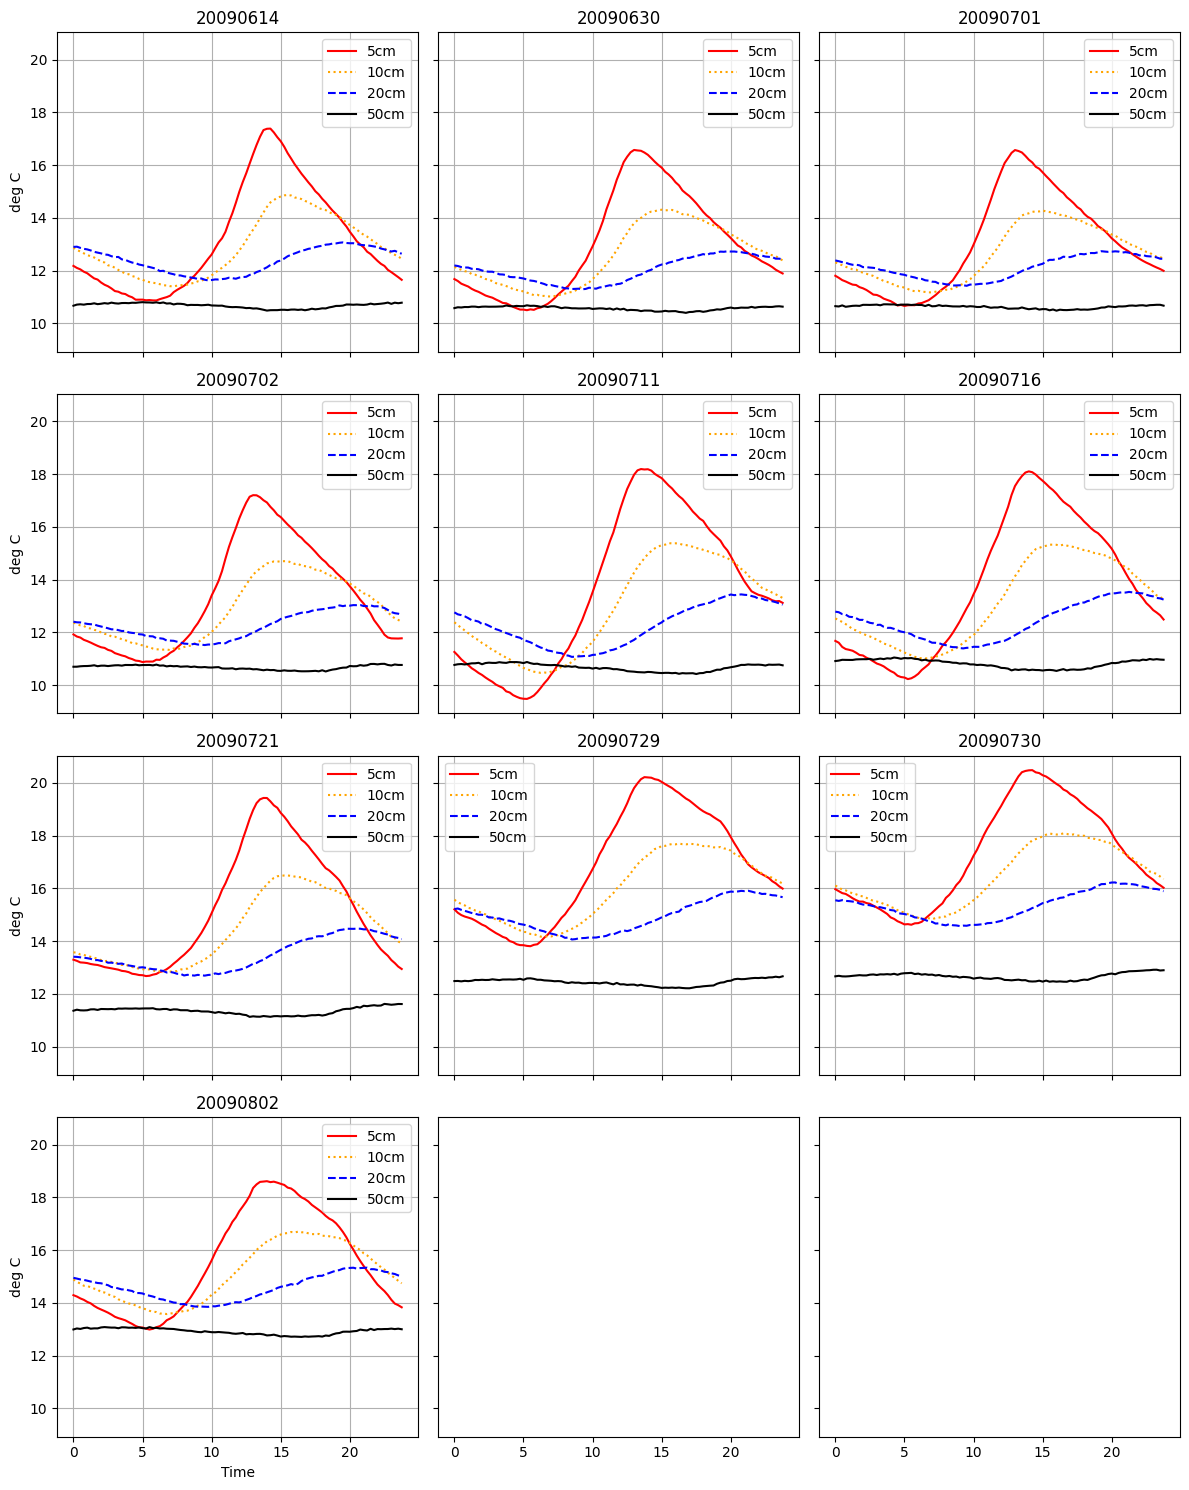

In [60]:
fig,ax=plt.subplots(4,3,figsize=(12,15),sharey=True,sharex=True)
ax=np.ndarray.flatten(ax)
for i,date in enumerate(dates):
    all_days[date][['time','T_1','T_2','T_3','T_4']].sort_values(by='time').plot(ax=ax[i],x='time',
              color=['red','orange','blue','black'],
              style=['-',':','--','-'])
    ax[i].legend(['5cm','10cm','20cm','50cm'])
    ax[i].set_ylabel('deg C')
    ax[i].set_xlabel('Time')
    ax[i].set_title(date)
    ax[i].grid()
plt.tight_layout()

## Question 4

The code block below will give the first and last record in the dataset.  You can use this to calculate the net warming/cooling of the soil over the 24 hours for each depth (5 cm, 10 cm, 20 cm and the 50 cm), i.e. the temperature change from midnight to midnight. Speculate what caused the warming or cooling observed if there was any.


#### Answer

Patterns vary by day and depth:

* Positive values would indicate net warming at a given depth
* Negative values would indicate net cooling at a given depth

Causes for net change:

* At shallow depths: responding to day-to-day variability in radiation, air temperature (to a lesser degree), and possibly precipitation.
* At depth, all but 7/11 are positive.  Responding to seasonal scale warming.  For 7/11 its counter to the seasonal pattern we would expect at this time of year.  Could be due to a precipitation event.

In [61]:
# A command to get rows of a dataframe based on their position and columns based on their names
# 0 is the first row (python counts up from 0) and -1 is the position of the last row
for date in dates:
    print(f'\n 24-hr change on {date}:')
    print(all_days[date].iloc[[0,-1],][['T_1','T_2','T_3','T_4']].diff().dropna())



 24-hr change on 20090614:
              T_1   T_2   T_3    T_4
TIME(PST)                           
2009-06-15 -0.528 -0.43 -0.26  0.114

 24-hr change on 20090630:
              T_1    T_2    T_3    T_4
TIME(PST)                             
2009-07-01  0.213  0.245  0.233  0.055

 24-hr change on 20090701:
              T_1    T_2    T_3    T_4
TIME(PST)                             
2009-07-02  0.187  0.134  0.062  0.019

 24-hr change on 20090702:
              T_1    T_2    T_3    T_4
TIME(PST)                             
2009-07-03 -0.147  0.033  0.263  0.068

 24-hr change on 20090711:
              T_1   T_2    T_3    T_4
TIME(PST)                            
2009-07-12  1.861  0.92  0.291 -0.014

 24-hr change on 20090716:
              T_1    T_2    T_3    T_4
TIME(PST)                             
2009-07-17  0.811  0.713  0.458  0.049

 24-hr change on 20090721:
              T_1   T_2    T_3    T_4
TIME(PST)                            
2009-07-22 -0.353  0.34  0.667  0.2

## Question 5

Using daily average soil temperature for each of the four depths ($T_1$ to $T_4$), determine the direction (away from or towards the ground surface) of the daily total $H_g$ in the soil layers from 5 - 10 cm, 10 - 20 cm and 20 - 50 cm?


####  Answer

* Decreasing $T$ would depth indicates thermal energy is traveling away from the surface (downward).
* Increasing $T$ with depth indicates thermal energy is traveling toward the surface (upnward).

All dates will have a net downward soil heat flux, $H_g$ would be positive (for each layer) for all days.

In [62]:
df[['T_1','T_2','T_3','T_4']].mean().diff()

for date in dates:
    print(date)
    print(all_days[date][['T_1','T_2','T_3','T_4']].mean().diff())
          

20090614
T_1         NaN
T_2   -0.303500
T_3   -0.500823
T_4   -1.714031
dtype: float64
20090630
T_1         NaN
T_2   -0.420833
T_3   -0.548333
T_4   -1.443010
dtype: float64
20090701
T_1         NaN
T_2   -0.385438
T_3   -0.522156
T_4   -1.477031
dtype: float64
20090702
T_1         NaN
T_2   -0.452083
T_3   -0.622385
T_4   -1.593229
dtype: float64
20090711
T_1         NaN
T_2   -0.637448
T_3   -0.718000
T_4   -1.564375
dtype: float64
20090716
T_1         NaN
T_2   -0.626292
T_3   -0.728479
T_4   -1.606677
dtype: float64
20090721
T_1         NaN
T_2   -0.729917
T_3   -0.952344
T_4   -2.119958
dtype: float64
20090729
T_1         NaN
T_2   -0.849167
T_3   -1.048313
T_4   -2.492083
dtype: float64
20090730
T_1         NaN
T_2   -0.837375
T_3   -1.106865
T_4   -2.683948
dtype: float64
20090802
T_1         NaN
T_2   -0.414552
T_3   -0.537562
T_4   -1.659750
dtype: float64


## Question 6

Calculate the daily total of $H_g$ at 7.5 cm depth in $\textrm{MJ}\, \textrm{m}^{-2}\, \textrm{day}^{-1}$ using the measured values from the soil heat flux plate. Compare the direction of $H_g$ to the direction of the heat flux obtained for the 5 -10 cm layer in question $2$.


#### Answer

Exact value will vary by day (see bellow).  On all days, the direction is the same as determined in the question above.

In [63]:

for date in dates:
    print(f'Hg on {date} was {np.round(all_days[date]["H_g"].sum()*(24*60*60)*1e-6,4)} MJ m-2 d-1\n')

Hg on 20090614 was 19.3484 MJ m-2 d-1

Hg on 20090630 was 20.088 MJ m-2 d-1

Hg on 20090701 was 19.2534 MJ m-2 d-1

Hg on 20090702 was 21.0133 MJ m-2 d-1

Hg on 20090711 was 20.6271 MJ m-2 d-1

Hg on 20090716 was 23.5086 MJ m-2 d-1

Hg on 20090721 was 28.4999 MJ m-2 d-1

Hg on 20090729 was 32.6912 MJ m-2 d-1

Hg on 20090730 was 33.5949 MJ m-2 d-1

Hg on 20090802 was 16.7633 MJ m-2 d-1



## Question 7

Find a method to estimate the thermal conductivity of the soil $k$ at noon that day. Is $k$ constant throughout the day?


#### Answer

Exact value will vary by day (see bellow).  The value can be calculated by inverting Fourier's law to solve for k.  

* Important to note: k should **positive**
* Need to give depths in m, not cm.

Can compare to a different timestamp (e.g., midnight) to show that k is **not** constant through the day.

* **Note** July 29th at midnight give a negative value of K > this is an artifact flux divergence (see lecture) and the the sensor separation the switch from postive to negative heatflux at 7.5 cm occurred just after midnight for this date.  Soils at depth were still warming (positive heat flux), while soils at shallower locations had begun cooling (negative heat flux).  This may happen for other dates in the late night/early morning hours, so don't discredit a negatvie k for the comparisons.  This method breaks down during the sign change of heat fluxes between T_1 and T_2.

In [64]:
# Save values of k (for later use in question 10 & 13)
noon_k = {}

for date in dates:
    print('\n')
    print(f'k at noon on {date}:')
    df = all_days[date].copy()
    noon = df.iloc[((df.index.hour==12)&(df.index.minute==0))]
    T_1 = noon['T_1'].values[0]
    z_1 = .05 # m
    T_2 = noon['T_2'].values[0]
    z_2 = .1 # m
    H_g = noon['H_g'].values[0]

    # Rearrange Fourier's Law
    k = (z_1-z_2)/(T_2-T_1)*H_g

    print(f'at noon {date}: k = {k:.2f} W m-1 K-1')
    noon_k[date] = k

    midnight = df.iloc[((df.index.hour==0)&(df.index.minute==0))]
    T_1 = midnight['T_1'].values[0]
    T_2 = midnight['T_2'].values[0]
    H_g = midnight['H_g'].values[0]

    # Rearrange Fourier's Law
    k = (z_1-z_2)/(T_2-T_1)*H_g

    print(f'at midnight on {date}: k = {k:.2f} W m-1 K-1')



k at noon on 20090614:
at noon 20090614: k = 0.32 W m-1 K-1
at midnight on 20090614: k = 0.22 W m-1 K-1


k at noon on 20090630:
at noon 20090630: k = 0.24 W m-1 K-1
at midnight on 20090630: k = 0.16 W m-1 K-1


k at noon on 20090701:
at noon 20090701: k = 0.24 W m-1 K-1
at midnight on 20090701: k = 0.16 W m-1 K-1


k at noon on 20090702:
at noon 20090702: k = 0.24 W m-1 K-1
at midnight on 20090702: k = 0.19 W m-1 K-1


k at noon on 20090711:
at noon 20090711: k = 0.22 W m-1 K-1
at midnight on 20090711: k = 0.10 W m-1 K-1


k at noon on 20090716:
at noon 20090716: k = 0.24 W m-1 K-1
at midnight on 20090716: k = 0.21 W m-1 K-1


k at noon on 20090721:
at noon 20090721: k = 0.23 W m-1 K-1
at midnight on 20090721: k = 0.21 W m-1 K-1


k at noon on 20090729:
at noon 20090729: k = 0.22 W m-1 K-1
at midnight on 20090729: k = -0.04 W m-1 K-1


k at noon on 20090730:
at noon 20090730: k = 0.22 W m-1 K-1
at midnight on 20090730: k = 0.09 W m-1 K-1


k at noon on 20090802:
at noon 20090802: k 

## Question 8

Find a method to estimate soil's heat capacity $C$ using the change in mid-day soil temperatures over a two-hour period.  Use the near-surface observations for you calculations (5 and 10 cm).  Hint: the exact choice of timestamps is up to you, but keep in mind the timestamp corresponds to the end of the averaging periods.  This means a timestamp of 12:15, corresponds to the interval 12:00-12:15, and the center point of the observation period would be 12:07.5.


#### Answer

You can invert the soil heat flux equation as shown in lecture.  Exact value will vary slightly depending on the specific timestamps chosen, but should be close.  

* If the C given is about half this, it would indicate that they didn't adjust the time conversion from the example in given in lecture 

In [65]:
for date in dates:
    df = all_days[date].iloc[48:48+9].copy()
    # print(df)
    # Start temp
    T_1 = (df.iloc[0]['T_1']+df.iloc[0]['T_2'])/2
    
    # End temp
    T_2 = (df.iloc[-1]['T_1']+df.iloc[-1]['T_2'])/2
    
    # Mean H_g over interval (if they give H_g mean as the average of start H_g and end H_g, that's fine too)
    H_g = df['H_g'].mean()

    Delta_T_delta_t=(T_2-T_1)/3600*2 # Change in temperature over the 2hr interval
    C_s = H_g/.05/Delta_T_delta_t * 1e-6 # Rearrange Fourier's Law and solve, and convert from J to MJ

    print(f'Between 12:00 and 14:00 on {date}: C = {C_s:.2f} MJ m-3 K-1')
    print()

# sprintf('C = %.2f MJ m-3 K-1',C_s)

Between 12:00 and 14:00 on 20090614: C = 0.27 MJ m-3 K-1

Between 12:00 and 14:00 on 20090630: C = 0.44 MJ m-3 K-1

Between 12:00 and 14:00 on 20090701: C = 0.50 MJ m-3 K-1

Between 12:00 and 14:00 on 20090702: C = 0.46 MJ m-3 K-1

Between 12:00 and 14:00 on 20090711: C = 0.30 MJ m-3 K-1

Between 12:00 and 14:00 on 20090716: C = 0.26 MJ m-3 K-1

Between 12:00 and 14:00 on 20090721: C = 0.25 MJ m-3 K-1

Between 12:00 and 14:00 on 20090729: C = 0.30 MJ m-3 K-1

Between 12:00 and 14:00 on 20090730: C = 0.33 MJ m-3 K-1

Between 12:00 and 14:00 on 20090802: C = 0.31 MJ m-3 K-1



## Question 9

Calculate the heat capacity $C$ of the soil using the lab analysis results (see introduction text) and measured soil water content $\theta_w$. Does your value obtained agree with $C$ calculated based on the the question above? Why or why not?  **Note** For subsequent calculations, use the value of $C$ from your answer to **this question**, and not $C$ from your answer to the previous question.


#### Answer

Use the linear equation for heat capacity of compound substances shown in lecture.  **Note** it's fine to ignore heat capacity of air because it's negligible compared to the others.  Heat capacity and specific heat are given in the table in [lecture](https://geos300.github.io/Lectures/08.html#/c-and-c-of-soil-materials).

* The key here is unit conversions between heat capacity and specific heat:

$C = theta_m C_m + theta_o C_o + theta_w C_w + theta_a C_a = M_m/1m-3 c_m + M_o/1m3 c_c + theta_w C_w + theta_a C_a$

* The final answer should not be the same as the value obtained above, they'll all work out to be a bit higher than estimated using the equation above.

* Possible reasons: **Must mention flux divergence** plus at least one more (other logical answers not listed also acceptable) for full credit.
    * Flux divergence (as shown in question 11) can be quite substantial through a soil profile.  So there can be significant attenuation of thermal energy and plus a significant time delay 
    * Change in soil properties with depth
    * Lack of precision for exact depth/spacing of soil temperature probes and heat flux plate
    * Values calculated from above are using averages over time 15 minute intervals, which is less precise than instantaneous values

* The values calculated from the lab analysis are likely closer to the true value.

In [66]:
## Provided in instructions
# Bulk density of soil
rho_s = 1.13 # Mg m-3
# Percent organic matter
f_o = 0.0377
# Porosity
P = 0.57

# Bulk density gives the weight of 1 m3 of soil.  
# Solve for organic mass in 1 m-3
M_o = rho_s*f_o
print(f'Organic mass per m-3: {M_o}')
# Solve for mineral mass in 1 m-3
M_m = rho_s-M_o
print(f'Mineral mass per m-3: {M_m}')

## Necessary Constants
# Heat Capacity of Water
C_w = 4.18 #MJ m-3 K-1
C_a = 0.0012 #MJ m-3 K-1
# Specific Heat of organic and mineral soils
c_o = 1.9 #kJ kg-1 K-1
c_m = 0.8 #kJ kg-1 K-1

print()

# Save values of C_s (for later use in question 10, 11 & 13)
C_s = {}

for date in dates:
    # Get Volumetric Content of Water
    # Can use value at any time step or average value over entire day.  The changes over the day are small.
    # Final answer should be between min and max
    Theta_w_mean = all_days[date]['WVC'].mean()
    Theta_a = P-Theta_w_mean

    C_s[date] = M_m/1*c_m+M_o/1*c_o+Theta_w_mean*C_w+Theta_a*C_a
    print(f'On {date}: C = {C_s[date]:.2f} MJ m-3 K-1')
    print()


Organic mass per m-3: 0.04260099999999999
Mineral mass per m-3: 1.087399

On 20090614: C = 1.69 MJ m-3 K-1

On 20090630: C = 1.74 MJ m-3 K-1

On 20090701: C = 1.73 MJ m-3 K-1

On 20090702: C = 1.73 MJ m-3 K-1

On 20090711: C = 1.84 MJ m-3 K-1

On 20090716: C = 1.83 MJ m-3 K-1

On 20090721: C = 1.84 MJ m-3 K-1

On 20090729: C = 1.91 MJ m-3 K-1

On 20090730: C = 1.91 MJ m-3 K-1

On 20090802: C = 1.93 MJ m-3 K-1



## Question 10

With $C$ from the question above, calculate the depths where you expect the amplitude of the diurnal and yearly waves to drop below 5\% of the amplitude of the sinusoidal surface temperature wave.


## Answer

The damping depth D is defined as $D = 2K/\omega$.  At $e^{-3}(3D)$ we drop below below 5% (see lecture notes). Using the given values of C from above, students should calculate K = k/C and use the two different angular frequencies ($\omega$) for the day (86,400 s) and the year
(31,536,000 s).

In [67]:
for date in dates:
    print(f'On {date}:')
    K = noon_k[date]/(C_s[date]*1e6) # C_s is in MJ (Convert to J before calculating K)
    print(f'K = {K:.2e} m-2 s-1')
    
    omega_d = (2*np.pi)/(86400)
    print(f'omega_d = {omega_d:.2e} s')
    D_d = 3*(2*K/omega_d)**.5
    print(f'5% Depth (daily) = {D_d:.2f} m')

    omega_y = (2*np.pi)/(31536000)
    print(f'omega_y = {omega_y:.2e} s')
    D_y = 3*(2*K/omega_y)**.5
    print(f'5% Depth (yearly) = {D_y:.2f} m')   
    print()
    


On 20090614:
K = 1.90e-07 m-2 s-1
omega_d = 7.27e-05 s
5% Depth (daily) = 0.22 m
omega_y = 1.99e-07 s
5% Depth (yearly) = 4.15 m

On 20090630:
K = 1.37e-07 m-2 s-1
omega_d = 7.27e-05 s
5% Depth (daily) = 0.18 m
omega_y = 1.99e-07 s
5% Depth (yearly) = 3.52 m

On 20090701:
K = 1.40e-07 m-2 s-1
omega_d = 7.27e-05 s
5% Depth (daily) = 0.19 m
omega_y = 1.99e-07 s
5% Depth (yearly) = 3.56 m

On 20090702:
K = 1.41e-07 m-2 s-1
omega_d = 7.27e-05 s
5% Depth (daily) = 0.19 m
omega_y = 1.99e-07 s
5% Depth (yearly) = 3.57 m

On 20090711:
K = 1.17e-07 m-2 s-1
omega_d = 7.27e-05 s
5% Depth (daily) = 0.17 m
omega_y = 1.99e-07 s
5% Depth (yearly) = 3.25 m

On 20090716:
K = 1.32e-07 m-2 s-1
omega_d = 7.27e-05 s
5% Depth (daily) = 0.18 m
omega_y = 1.99e-07 s
5% Depth (yearly) = 3.45 m

On 20090721:
K = 1.23e-07 m-2 s-1
omega_d = 7.27e-05 s
5% Depth (daily) = 0.17 m
omega_y = 1.99e-07 s
5% Depth (yearly) = 3.33 m

On 20090729:
K = 1.13e-07 m-2 s-1
omega_d = 7.27e-05 s
5% Depth (daily) = 0.17 m
omega_y =

## Question 11

The soil heat flux density $H_g$ is not measured at the surface, but rather at 7.5 cm depth. Using $\Delta T_1 / \Delta t$ as a surrogate for the average warming / cooling rates in the whole layer from 0 to 7.5 cm, correct the soil heat flux density and find the value at the surface $H_{g(0)}$ at 10:00 and at 19:00.


Heat flux divergence ($\Delta H_G$) is the heat flux that goes into warming a layer instead of passing through the layer.  **Note** there was a missing negative sign in the original lecture equation, so we are accepting two answers:

In [68]:
for date in dates:
    print(f'On {date}:')
    df = all_days[date].copy()

    tenAM = df.loc[((df.index.hour==10)&(df.index.minute<=15))].copy()# Get the 10am timestamp and the one immediately following
    Delta_T_delta_t = (tenAM.iloc[1]['T_1']-tenAM.iloc[0]['T_1'])/(15*60) # Warming rate "at" 10 am
    delta_z = 0.075 #m
    Delta_T_H_g = -delta_z*C_s[date]*Delta_T_delta_t*1e6
    Delta_T_H_g_error = delta_z*C_s[date]*Delta_T_delta_t*1e6
    print(f'Flux Divergence in the top 7.5 cm at 10 am was: {Delta_T_H_g:.2f} W m-2')
    print(f'But we will also accept: {Delta_T_H_g_error:.2f} W m-2')
    Corrected_H_g = -(tenAM['H_g'].mean()+Delta_T_H_g)
    Corrected_H_g_error = tenAM['H_g'].mean()-Delta_T_H_g_error
    print(f'Estimated H_g at the surface at 10 am was: {Corrected_H_g:.2f} W m-2')
    print(f'But we will also accept: {Corrected_H_g_error:.2f} W m-2')
    print()
    sevenPM = df.loc[((df.index.hour==19)&(df.index.minute<=15))].copy()# Get the 7pm timestamp and the one immediately following
    Delta_T_delta_t = (sevenPM.iloc[1]['T_1']-sevenPM.iloc[0]['T_1'])/(15*60) # Cooling rate "at" 7 pm
    delta_z = 0.075 #m
    Delta_T_H_g = -delta_z*C_s[date]*Delta_T_delta_t*1e6
    Delta_T_H_g_error = delta_z*C_s[date]*Delta_T_delta_t*1e6
    print(f'Flux Divergence in the top 7.5 cm at 7 pm was: {Delta_T_H_g:.2f} W m-2')
    print(f'But we will also accept: {Delta_T_H_g_error:.2f} W m-2')
    Corrected_H_g = -(tenAM['H_g'].mean()+Delta_T_H_g)
    Corrected_H_g_error = tenAM['H_g'].mean()-Delta_T_H_g_error
    print(f'Estimated H_g at the surface at 7 pm was: {Corrected_H_g:.2f} W m-2')
    print(f'But we will also accept: {Corrected_H_g_error:.2f} W m-2')
    print()
    print()

On 20090614:
Flux Divergence in the top 7.5 cm at 10 am was: -22.66 W m-2
But we will also accept: 22.66 W m-2
Estimated H_g at the surface at 10 am was: 16.50 W m-2
But we will also accept: -16.50 W m-2

Flux Divergence in the top 7.5 cm at 7 pm was: 18.16 W m-2
But we will also accept: -18.16 W m-2
Estimated H_g at the surface at 7 pm was: -24.32 W m-2
But we will also accept: 24.32 W m-2


On 20090630:
Flux Divergence in the top 7.5 cm at 10 am was: -38.32 W m-2
But we will also accept: 38.32 W m-2
Estimated H_g at the surface at 10 am was: 31.42 W m-2
But we will also accept: -31.42 W m-2

Flux Divergence in the top 7.5 cm at 7 pm was: 16.48 W m-2
But we will also accept: -16.48 W m-2
Estimated H_g at the surface at 7 pm was: -23.38 W m-2
But we will also accept: 23.38 W m-2


On 20090701:
Flux Divergence in the top 7.5 cm at 10 am was: -41.86 W m-2
But we will also accept: 41.86 W m-2
Estimated H_g at the surface at 10 am was: 35.22 W m-2
But we will also accept: -35.22 W m-2

Flu

## Question 12

Draw a graph of $R_n$ ($x$-axis) against $H_g$ ($y$-axis). Might we use $R_n$ to predict $H_g$ at 7.5 cm depth? What do we call this curve's characteristic? Explain the physical reason for the curve's shape. 


#### Answer

Chart below shows plot for each day.  **Note**: not expected to color data points by time, that's just included here for illustrative purposes.

* The curves show a hysteresis loop:
    * **Note**: do not need to use the word "hysteresis" to get full credit, just describe the phenomena
    * There is time needed for the heat flux (temperature wave) to arrive at depth 7.5 cm because thermal conductivity and heat capacity of the layer above (or thermal diffusivity) delay the progression of the temperature wave.

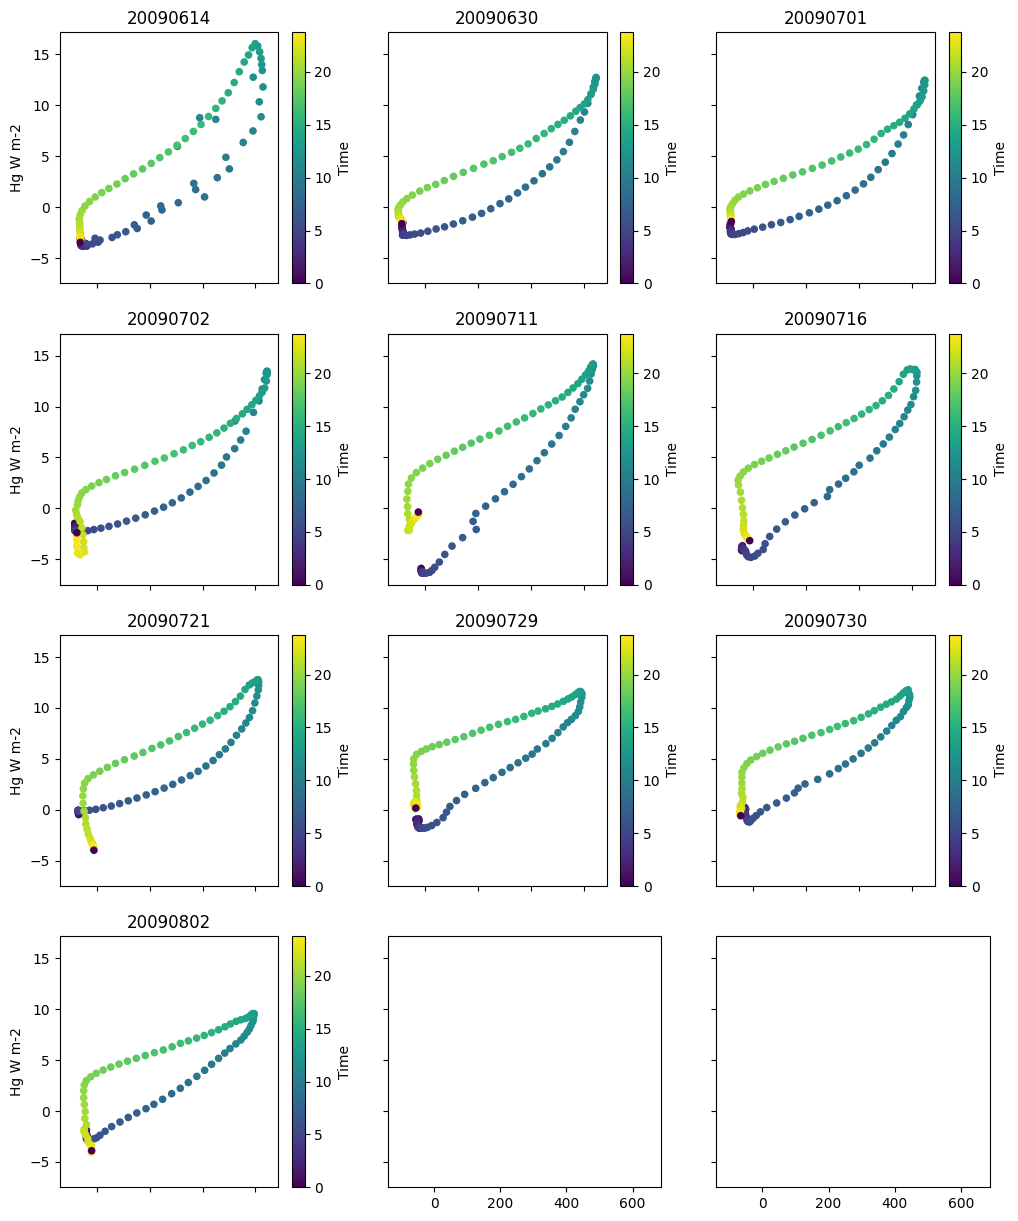

In [69]:
fig,ax=plt.subplots(4,3,figsize=(12,15),sharey=True,sharex=True)
ax=np.ndarray.flatten(ax)
for i,date in enumerate(dates):
    df = all_days[date].copy()
    df['Time']=df.index.hour+df.index.minute/60
    p = df.plot.scatter(x='R_n',y='H_g',c='Time',ax=ax[i],colormap='viridis')
    
    ax[i].set_xlabel('Rn W m-2')
    ax[i].set_ylabel('Hg W m-2')
    ax[i].set_title(f'{date}')

## Question 13

Calculate the thermal admittance of the atmosphere $\mu_a$ at noon.


#### Answer

1. Calculate ground heat flux (H_g) at the surface (corrected for flux divergence)
2. Get sensible heat flux (H)
3. Using values of k & C_s attained previously, get thermal admittance of soil (mu_s)
4. Using heat sharing equation get thermal admittance of air (mu_a)


In [70]:

for date in dates:
    print(f'At noon on {date}:')
    df = all_days[date].copy()

    noon = df.loc[((df.index.hour==12)&(df.index.minute<=15))].copy()# Get the 12am timestamp and the one immediately following
    Delta_T_delta_t = (noon.iloc[1]['T_1']-noon.iloc[0]['T_1'])/(15*60) # Warming rate "at" 10 am
    delta_z = 0.075 #m
    Delta_T_H_g = -delta_z*C_s[date]*Delta_T_delta_t*1e6
    Corrected_H_g = -(noon['H_g'].mean()+Delta_T_H_g)
    print(f'H_g (surface) = {Corrected_H_g:.2f} W m-2')
    print(f'H at 2m = {noon["H_filled"].mean():.2f} W m-2')

    # Thermal admittance of the soil
    mu_s = (noon_k[date]*C_s[date])**.5
    print(f'Thermal admittance (soil) = {mu_s:.2f} J m-2 K-1 s-1/2')

    # Thermal admittance of the air
    mu_a = noon['H_filled'].mean()*mu_s/Corrected_H_g
    print(f'Thermal admittance (air) = {mu_a:.2f} J m-2 K-1 s-1/2')
    print()
    print('As per the error in the original heat flux divergence equation, we will also accept:')
    Delta_T_H_g = delta_z*C_s[date]*Delta_T_delta_t*1e6
    Corrected_H_g = noon['H_g'].mean()-Delta_T_H_g
    print(f'H_g (surface) = {Corrected_H_g:.2f} W m-2')
    mu_a = noon['H_filled'].mean()*mu_s/Corrected_H_g
    print(f'Thermal admittance (air) = {mu_a:.2f} J m-2 K-1 s-1/2')
    print()

At noon on 20090614:
H_g (surface) = 45.75 W m-2
H at 2m = 237.18 W m-2
Thermal admittance (soil) = 0.74 J m-2 K-1 s-1/2
Thermal admittance (air) = 3.82 J m-2 K-1 s-1/2

As per the error in the original heat flux divergence equation, we will also accept:
H_g (surface) = -45.75 W m-2
Thermal admittance (air) = -3.82 J m-2 K-1 s-1/2

At noon on 20090630:
H_g (surface) = 34.14 W m-2
H at 2m = 268.35 W m-2
Thermal admittance (soil) = 0.64 J m-2 K-1 s-1/2
Thermal admittance (air) = 5.05 J m-2 K-1 s-1/2

As per the error in the original heat flux divergence equation, we will also accept:
H_g (surface) = -34.14 W m-2
Thermal admittance (air) = -5.05 J m-2 K-1 s-1/2

At noon on 20090701:
H_g (surface) = 35.62 W m-2
H at 2m = 282.48 W m-2
Thermal admittance (soil) = 0.65 J m-2 K-1 s-1/2
Thermal admittance (air) = 5.15 J m-2 K-1 s-1/2

As per the error in the original heat flux divergence equation, we will also accept:
H_g (surface) = -35.62 W m-2
Thermal admittance (air) = -5.15 J m-2 K-1 s-1/2

## Question 14

The Bowen ratio $\beta$ describes the ratio between the sensible and latent heat flux densities directed into the atmosphere, i.e.\ $\beta = H/LE$. Calculate $\beta$ from the available data for noon that day. Neglect the energy use for photosynthesis.


#### Answer

1. Estimate LE from energy conservation equation (ignoring storage term)

$LE = R_n - (H_g+H)$

2. Get Bowen Ration ($Beta$) as:

$Beta = H/LE$


In [71]:

for date in dates:
    print(f'At noon on {date}:')
    df = all_days[date].copy()

    noon = df.loc[((df.index.hour==12)&(df.index.minute<=15))].copy()# Get the 10am timestamp and the one immediately following
    Delta_T_delta_t = (noon.iloc[1]['T_1']-noon.iloc[0]['T_1'])/(15*60) # Warming rate "at" 10 am
    delta_z = 0.075 #m
    Delta_T_H_g = delta_z*C_s[date]*Delta_T_delta_t*1e6
    Corrected_H_g = noon['H_g'].mean()+Delta_T_H_g
    print(f'R_n at 2m = {noon["R_n"].mean():.2f} W m-2')
    print(f'H_g (surface) = {Corrected_H_g:.2f} W m-2')
    print(f'H at 2m = {noon["H_filled"].mean():.2f} W m-2')

    # Solve the energy balance equation
    noon['LE'] = noon['R_n']-(noon['H_filled']+noon['H_g'])
    print(f'LE at 2m = {noon["LE"].mean():.2f} W m-2')
    Beta = noon['H'].mean()/noon['LE'].mean()
    print(f'Bowen ratio = {Beta:.2f} W m-2')
    print()

At noon on 20090614:
R_n at 2m = 608.70 W m-2
H_g (surface) = 71.93 W m-2
H at 2m = 237.18 W m-2
LE at 2m = 358.44 W m-2
Bowen ratio = 0.68 W m-2

At noon on 20090630:
R_n at 2m = 646.65 W m-2
H_g (surface) = 59.55 W m-2
H at 2m = 268.35 W m-2
LE at 2m = 365.60 W m-2
Bowen ratio = 0.73 W m-2

At noon on 20090701:
R_n at 2m = 648.35 W m-2
H_g (surface) = 60.52 W m-2
H at 2m = 282.48 W m-2
LE at 2m = 353.42 W m-2
Bowen ratio = 0.80 W m-2

At noon on 20090702:
R_n at 2m = 643.60 W m-2
H_g (surface) = 66.54 W m-2
H at 2m = 257.00 W m-2
LE at 2m = 373.13 W m-2
Bowen ratio = 0.68 W m-2

At noon on 20090711:
R_n at 2m = 634.85 W m-2
H_g (surface) = 82.11 W m-2
H at 2m = 239.17 W m-2
LE at 2m = 381.84 W m-2
Bowen ratio = 0.61 W m-2

At noon on 20090716:
R_n at 2m = 618.00 W m-2
H_g (surface) = 68.09 W m-2
H at 2m = 231.00 W m-2
LE at 2m = 374.29 W m-2
Bowen ratio = 0.64 W m-2

At noon on 20090721:
R_n at 2m = 611.45 W m-2
H_g (surface) = 66.48 W m-2
H at 2m = 232.23 W m-2
LE at 2m = 367.23 W m